<a href="https://colab.research.google.com/github/sajjad-210/skills-introduction-to-github/blob/main/Distance_measure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DISTANCEMEASURE

/content/drive/MyDrive/DISTANCEMEASURE


In [ ]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/iris_csv.csv')

# Print the DataFrame
print(df)

     sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


EUCLIDEAN DISTANCE

In [ ]:
import math
def euclidean_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)


In [ ]:
# Extract only the features for distance calculation (ignore the label column)
features = df.iloc[:, :-1].values

In [ ]:
# Calculate Euclidean distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = euclidean_distance(features[i], features[j])
        distances.append((i, j, dist))

# Print a few example distances
for dist in distances[:2000]:  # Print first 10 distances
    print(f"Distance between point {dist[0]} and point {dist[1]}: {dist[2]}")

Distance between point 0 and point 1: 0.5385164807134502
Distance between point 0 and point 2: 0.509901951359278
Distance between point 0 and point 3: 0.648074069840786
Distance between point 0 and point 4: 0.1414213562373093
Distance between point 0 and point 5: 0.6164414002968979
Distance between point 0 and point 6: 0.5196152422706632
Distance between point 0 and point 7: 0.17320508075688762
Distance between point 0 and point 8: 0.9219544457292882
Distance between point 0 and point 9: 0.4690415759823426
Distance between point 0 and point 10: 0.37416573867739483
Distance between point 0 and point 11: 0.3741657386773941
Distance between point 0 and point 12: 0.5916079783099616
Distance between point 0 and point 13: 0.9949874371066197
Distance between point 0 and point 14: 0.8831760866327848
Distance between point 0 and point 15: 1.1045361017187267
Distance between point 0 and point 16: 0.5477225575051664
Distance between point 0 and point 17: 0.09999999999999998
Distance between point

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
euclidean = pd.DataFrame(distances1, columns=["A","B","euclidean"])
euclidean.to_excel("distance.xlsx",index=False)

In [ ]:
df.to_excel("/content/distance.xlsx",index=False)

##code continued

In [ ]:
# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])

# Print the shortest distance and the corresponding points
print(f"The shortest distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")

The shortest distance is between point 9 and point 34: 0.0


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

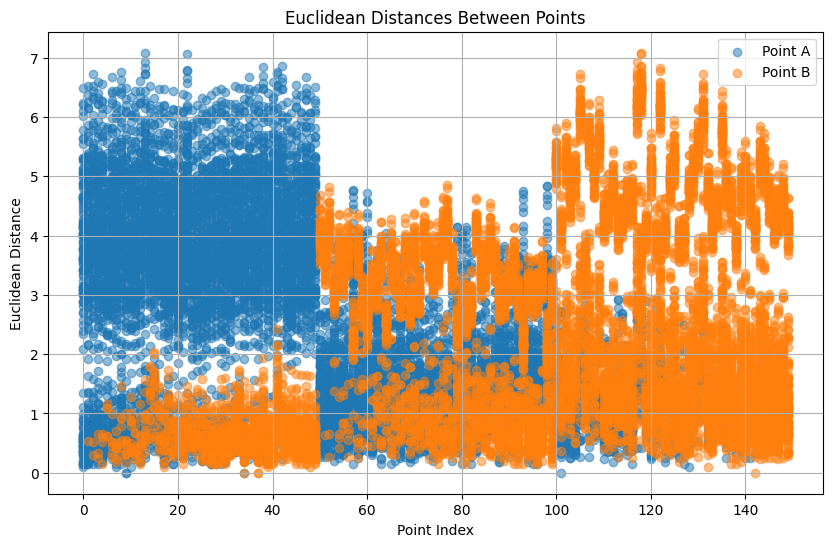

In [ ]:
# Scatter plot of the distances
plt.figure(figsize=(10, 6))
plt.scatter(euclidean["A"], euclidean["euclidean"], label='Point A', alpha=0.5)
plt.scatter(euclidean["B"], euclidean["euclidean"], label='Point B', alpha=0.5)

plt.title('Euclidean Distances Between Points')
plt.xlabel('Point Index')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.grid(True)
plt.show()

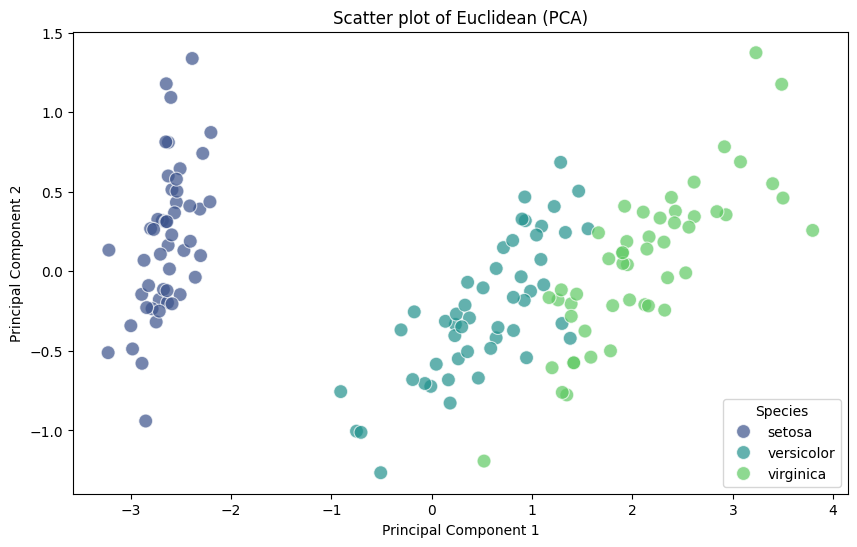

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Apply PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Mapping the target to the species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Scatter plot of Euclidean (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


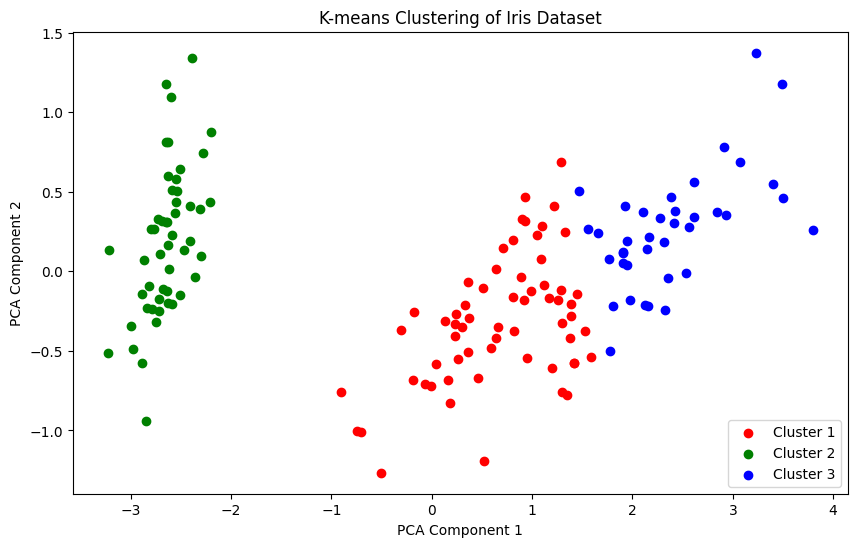

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Plot the data using the K-means cluster labels
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_points = data_2d[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


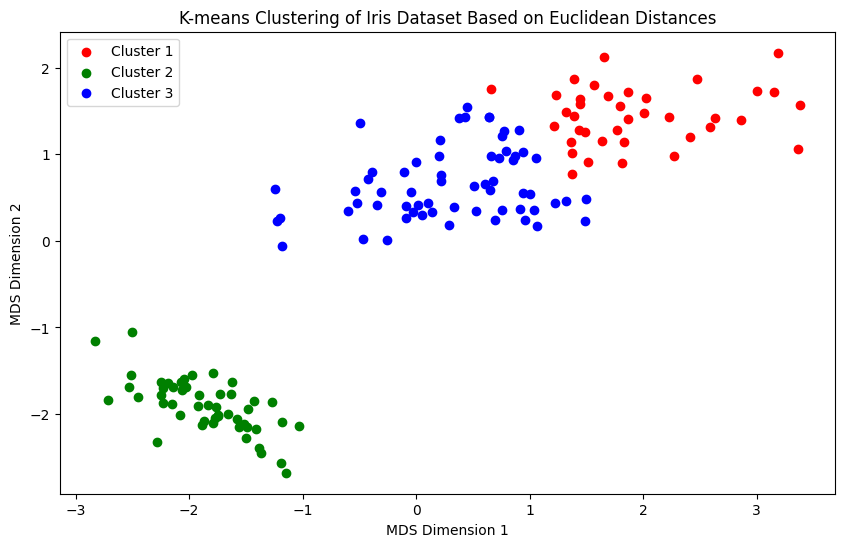

In [ ]:
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target

# Step 2: Calculate Euclidean Distances
distance_matrix = squareform(pdist(data, metric='euclidean'))

# Step 3: Apply K-means clustering on the distance matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Step 4: Dimensionality Reduction using MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_2d = mds.fit_transform(distance_matrix)

# Step 5: Create the Scatter Plot
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_points = data_2d[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Euclidean Distances')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


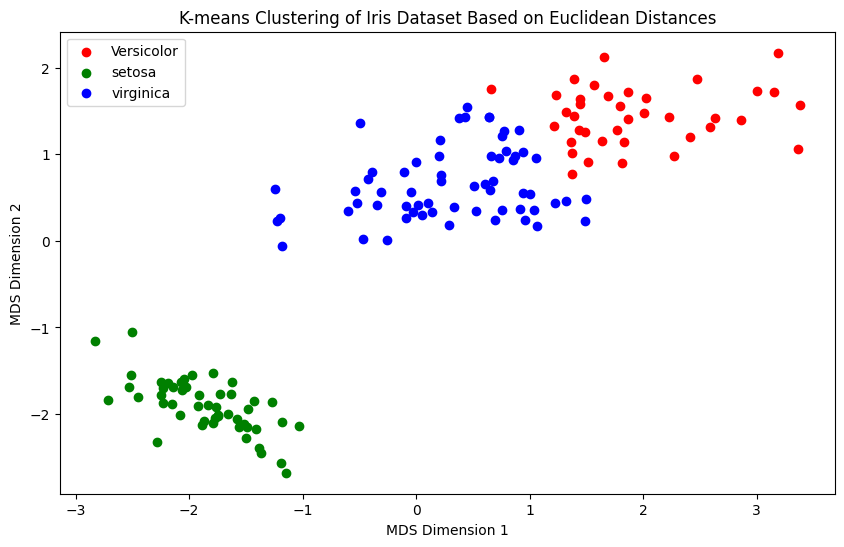

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Calculate Euclidean distances
distance_matrix = squareform(pdist(data, metric='euclidean'))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Reduce dimensionality using MDS for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_2d = mds.fit_transform(distance_matrix)

# Map the K-means labels to species names
# Assuming the green color should be Setosa
cluster_to_species = {0: 'Versicolor', 1: 'setosa', 2: 'virginica'}
colors = ['red', 'green', 'blue']

# Plot the data using the K-means cluster labels
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_points = data_2d[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=cluster_to_species[i])

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Euclidean Distances')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


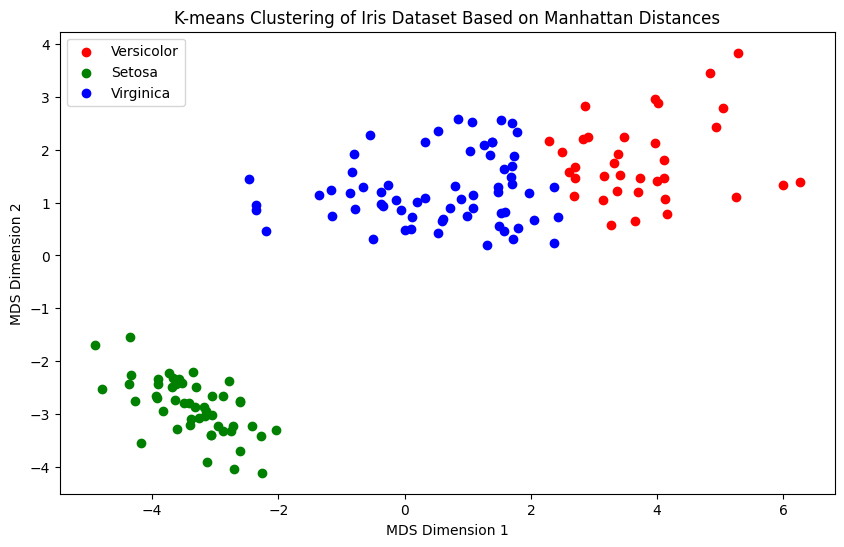

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Calculate Manhattan distances
distance_matrix = squareform(pdist(data, metric='cityblock'))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Reduce dimensionality using MDS for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_2d = mds.fit_transform(distance_matrix)

# Create a mapping from K-means labels to species names
# This mapping might need to be adjusted based on the actual clustering output
# For simplicity, we'll assume K-means labels match the order of species names
# Adjust this part if necessary based on the clustering results
label_to_species = {0: 'Versicolor', 1: 'Setosa', 2: 'Virginica'}

# Plot the data using the K-means cluster labels
plt.figure(figsize=(10, 6))
colors = {'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'}
for i in range(3):
    species = label_to_species[i]
    cluster_points = data_2d[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Manhattan Distances')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


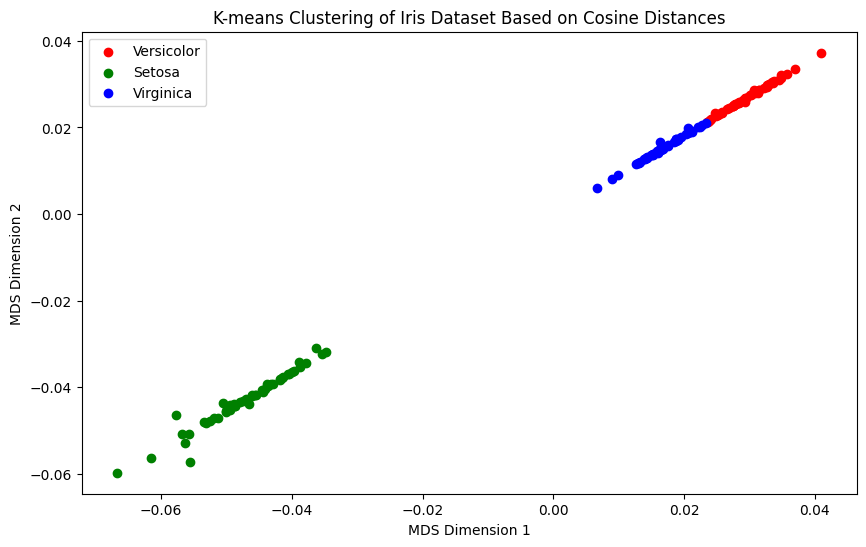

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Calculate Cosine distances
distance_matrix = squareform(pdist(data, metric='cosine'))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Reduce dimensionality using MDS for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_2d = mds.fit_transform(distance_matrix)

# Map the K-means labels to species names
# This mapping might need to be adjusted based on the actual clustering output
# For simplicity, we'll assume K-means labels match the order of species names
# Adjust this part if necessary based on the clustering results
label_to_species = {0: 'Versicolor', 1: 'Setosa', 2: 'Virginica'}

# Plot the data using the K-means cluster labels
plt.figure(figsize=(10, 6))
colors = {'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'}
for i in range(3):
    species = label_to_species[i]
    cluster_points = data_2d[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Cosine Distances')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


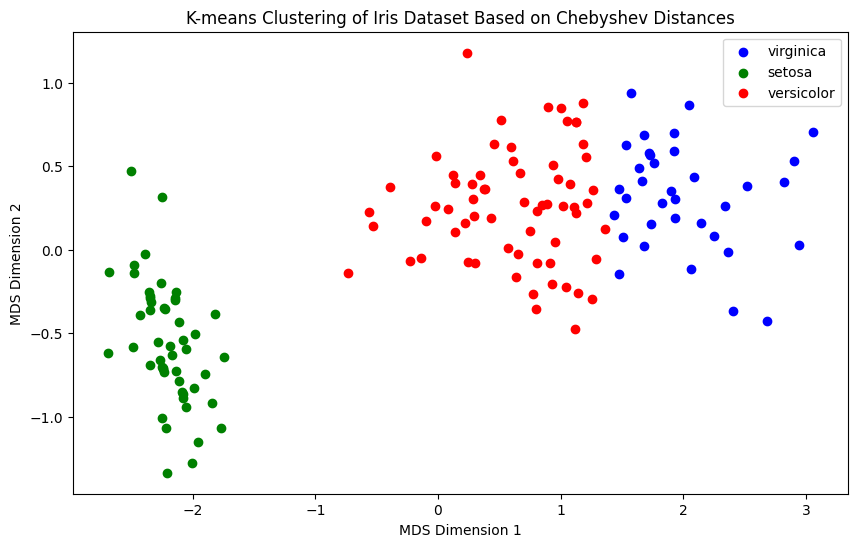

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from collections import Counter

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Calculate Chebyshev distances
distance_matrix = squareform(pdist(data, metric='chebyshev'))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Reduce dimensionality using MDS for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_2d = mds.fit_transform(distance_matrix)

# Create a mapping from K-means labels to species names based on majority voting
label_to_species = {}
for i in range(3):
    mask = (kmeans_labels == i)
    species_count = Counter(true_labels[mask])
    most_common_species = species_count.most_common(1)[0][0]
    label_to_species[i] = species_names[most_common_species]

# Plot the data using the K-means cluster labels
plt.figure(figsize=(10, 6))
colors = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'blue'}
for i in range(3):
    species = label_to_species[i]
    cluster_points = data_2d[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Chebyshev Distances')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


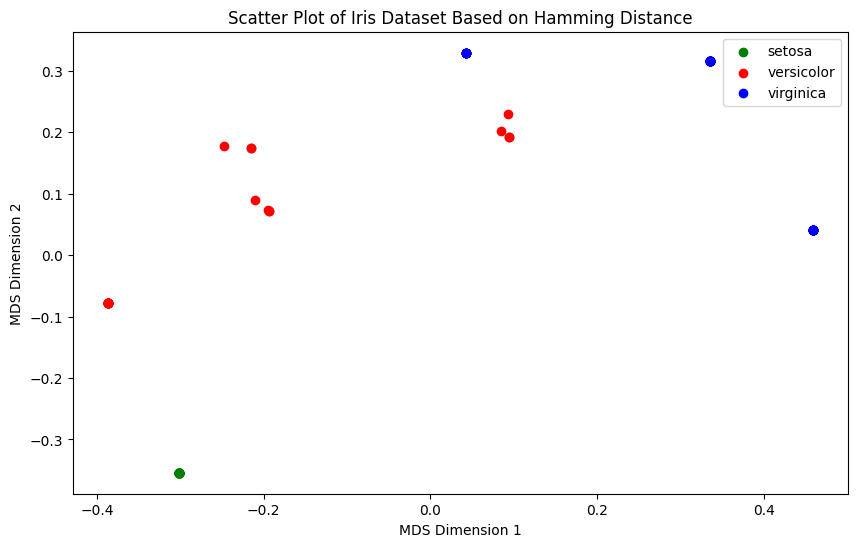

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Binarize the data using median
data_binary = (data_scaled > np.median(data_scaled, axis=0)).astype(int)

# Create a distance matrix using Hamming distance
distance_matrix = squareform(pdist(data_binary, metric='hamming'))

# Apply MDS to reduce to 2 dimensions for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_mds = mds.fit_transform(distance_matrix)

# Plotting the data points
plt.figure(figsize=(10, 6))
colors = ['green', 'red', 'blue']
labels = ['setosa', 'versicolor', 'virginica']
for i, color, label in zip(range(3), colors, labels):
    plt.scatter(data_mds[true_labels == i, 0], data_mds[true_labels == i, 1], c=color, label=label)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('Scatter Plot of Iris Dataset Based on Hamming Distance')
plt.legend()
plt.show()


MANHATTAN DISTANCE

In [ ]:
def manhattan_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")
    distance = 0.0
    for i in range(len(point1)):
        distance += abs(point1[i] - point2[i])
    return distance

In [ ]:
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = manhattan_distance(features[i], features[j])
        distances.append((i, j, dist))


In [ ]:
for dist in distances[:2000]:  # Print first 2000 distances
    print(f"Distance between point {dist[0]} and point {dist[1]}: {dist[2]}")

Distance between point 0 and point 1: 0.6999999999999993
Distance between point 0 and point 2: 0.7999999999999992
Distance between point 0 and point 3: 1.0
Distance between point 0 and point 4: 0.19999999999999973
Distance between point 0 and point 5: 1.2000000000000006
Distance between point 0 and point 6: 0.7000000000000001
Distance between point 0 and point 7: 0.2999999999999998
Distance between point 0 and point 8: 1.2999999999999994
Distance between point 0 and point 9: 0.7999999999999993
Distance between point 0 and point 10: 0.600000000000001
Distance between point 0 and point 11: 0.6000000000000001
Distance between point 0 and point 12: 0.8999999999999998
Distance between point 0 and point 13: 1.6999999999999997
Distance between point 0 and point 14: 1.4000000000000001
Distance between point 0 and point 15: 1.800000000000001
Distance between point 0 and point 16: 1.0000000000000004
Distance between point 0 and point 17: 0.09999999999999998
Distance between point 0 and point 18:

In [ ]:
shortest_distance = min(distances, key=lambda x: x[2])

# Print the shortest distance and the corresponding points
print(f"The shortest Manhattan distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")


The shortest Manhattan distance is between point 9 and point 34: 0.0


In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
manhattan = pd.DataFrame(distances1, columns=["A","B","manhattan"])
manhattan.to_excel("temp.xlsx",index=False)

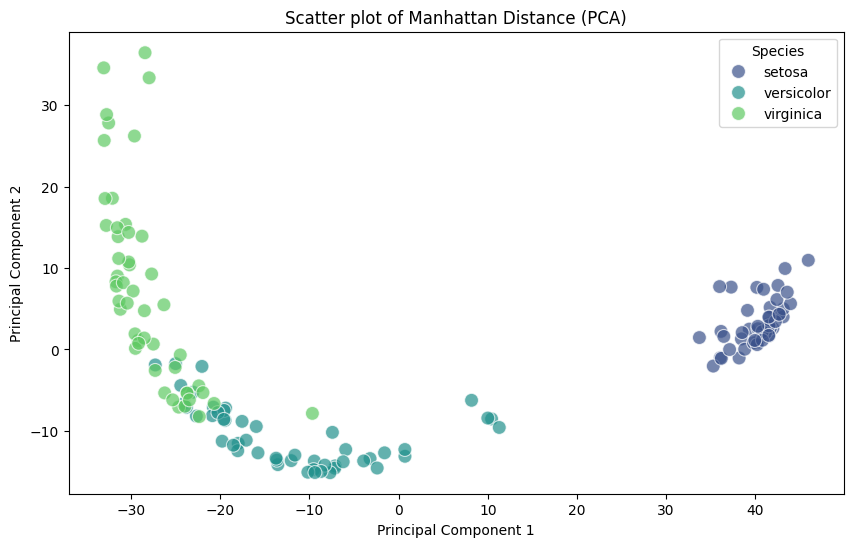

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Compute Manhattan distance
manhattan_distance = np.abs(X[:, np.newaxis] - X).sum(axis=2)

# Apply PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(manhattan_distance)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Mapping the target to the species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Scatter plot of Manhattan Distance (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Calculate Manhattan distances
distance_matrix = squareform(pdist(data, metric='cityblock'))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Reduce dimensionality using MDS for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_2d = mds.fit_transform(distance_matrix)

# Map the K-means labels to species names
# Assuming the order: Setosa, Versicolor, Virginica
# Adjust based on actual clustering results
species_label_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
# Adjust the mapping to ensure green is Setosa
mapped_labels = [species_label_mapping[label] for label in kmeans_labels]

# Plot the data using the K-means cluster labels
plt.figure(figsize=(10, 6))
colors = {'Setosa': 'green', 'Versicolor': 'red', 'Virginica': 'blue'}
for species in species_names:
    species_points = data_2d[np.array(mapped_labels) == species]
    plt.scatter(species_points[:, 0], species_points[:, 1], c=colors[species], label=species)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Manhattan Distances')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


KeyError: 'setosa'

<Figure size 1000x600 with 0 Axes>

COSINE DISTANCE

In [ ]:
# Function to calculate cosine similarity
def cosine_similarity(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")
    dot_product = sum(p1 * p2 for p1, p2 in zip(point1, point2))
    norm_a = math.sqrt(sum(p1 * p1 for p1 in point1))
    norm_b = math.sqrt(sum(p2 * p2 for p2 in point2))
    if norm_a == 0 or norm_b == 0:
        return 0.0  # To handle the case when one of the vectors is zero
    return dot_product / (norm_a * norm_b)

# Function to calculate cosine distance
def cosine_distance(point1, point2):
    return 1 - cosine_similarity(point1, point2)

In [ ]:
# Calculate cosine distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = cosine_distance(features[i], features[j])
        distances.append((i, j, dist))

In [ ]:
# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])

# Print the shortest distance and the corresponding points
print(f"The shortest Cosine distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")

The shortest Cosine distance is between point 9 and point 34: 0.0


In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
cosine = pd.DataFrame(distances1, columns=["A","B","cosine"])
cosine.to_excel("Ctemp.xlsx",index=False)

In [ ]:
df2 = pd.read_excel('/content/Ctemp.xlsx',sheet_name='Sheet1', usecols="C")
df["cosine"] = df2
df.to_excel("/content/Ctemp.xlsx",index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Ctemp.xlsx'

CHEBYSHEV DISTANCE

In [ ]:
# Function to calculate Chebyshev distance
def chebyshev_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")
    return max(abs(p1 - p2) for p1, p2 in zip(point1, point2))

In [ ]:
# Calculate Chebyshev distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = chebyshev_distance(features[i], features[j])
        distances.append((i, j, dist))

# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])

In [ ]:
# Get the class names of the corresponding data points
class1 = features[shortest_distance[0]]
class2 = features[shortest_distance[1]]

# Print the shortest distance and the corresponding class names
print(f"The shortest Chebyshev distance is between {class1} and {class2}: {shortest_distance[2]}")

In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {dist[2]}")

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
chebyshev_distance = pd.DataFrame(distances1, columns=["A","B","chebyshev"])
chebyshev_distance.to_excel("CHEB.xlsx",index=False)

CANBERRA DISTANCE

In [ ]:
# Function to calculate Canberra distance
def canberra_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimension")
    distance = sum(abs(p1 - p2) / (abs(p1) + abs(p2)) if (p1 + p2) != 0 else 0 for p1, p2 in zip(point1, point2))
    return distance

In [ ]:
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = canberra_distance(features[i], features[j])
        distances.append((i, j, dist))


In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {dist[2]}")

In [ ]:
# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])
# Print the shortest distance and the corresponding points
print(f"The shortest canberra distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")



In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
canberra = pd.DataFrame(distances1, columns=["A","B","canberra"])
canberra.to_excel("CANB.xlsx",index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


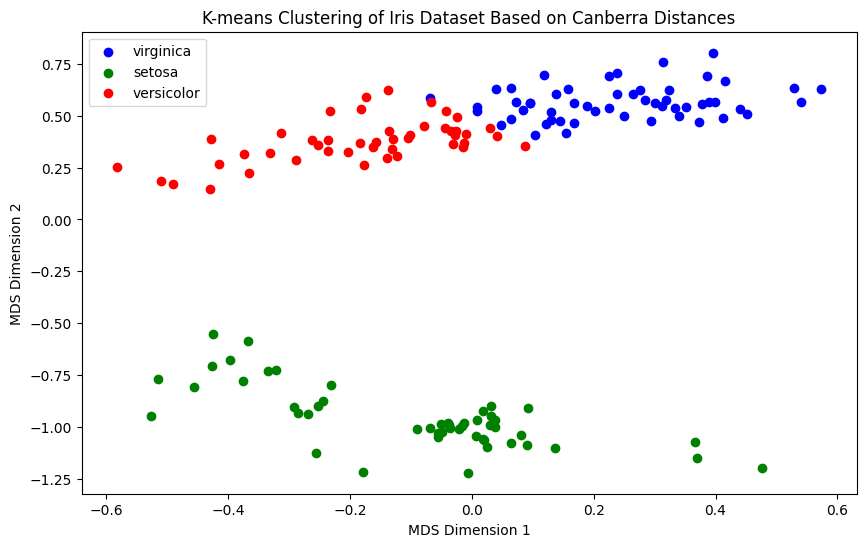

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from collections import Counter

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Calculate Canberra distances
distance_matrix = squareform(pdist(data, metric='canberra'))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Reduce dimensionality using MDS for visualization
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
data_2d = mds.fit_transform(distance_matrix)

# Create a mapping from K-means labels to species names based on majority voting
label_to_species = {}
for i in range(3):
    mask = (kmeans_labels == i)
    species_count = Counter(true_labels[mask])
    most_common_species = species_count.most_common(1)[0][0]
    label_to_species[i] = species_names[most_common_species]

# Plot the data using the K-means cluster labels
plt.figure(figsize=(10, 6))
colors = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'blue'}
for i in range(3):
    species = label_to_species[i]
    cluster_points = data_2d[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Canberra Distances')
plt.legend()
plt.show()


PEARSON CORRELATION

In [ ]:
# Function to calculate Pearson correlation coefficient
def pearson_correlation(point1, point2):
    n = len(point1)
    sum1 = sum(point1)
    sum2 = sum(point2)
    sum1_sq = sum(p1**2 for p1 in point1)
    sum2_sq = sum(p2**2 for p2 in point2)
    p_sum = sum(p1 * p2 for p1, p2 in zip(point1, point2))

    num = p_sum - (sum1 * sum2 / n)
    den = math.sqrt((sum1_sq - sum1**2 / n) * (sum2_sq - sum2**2 / n))
    if den == 0:
        return 0
    return num / den

# Function to calculate Pearson distance
def pearson_distance(point1, point2):
    return 1 - pearson_correlation(point1, point2)

In [ ]:
# Calculate Pearson distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = pearson_distance(features[i], features[j])
        distances.append((i, j, dist))

In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {dist[2]}")

In [ ]:
# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])

# Print the shortest distance and the corresponding class names
print(f"The shortest pearson distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
pearson = pd.DataFrame(distances1, columns=["A","B","pearson"])
pearson.to_excel("pear.xlsx",index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


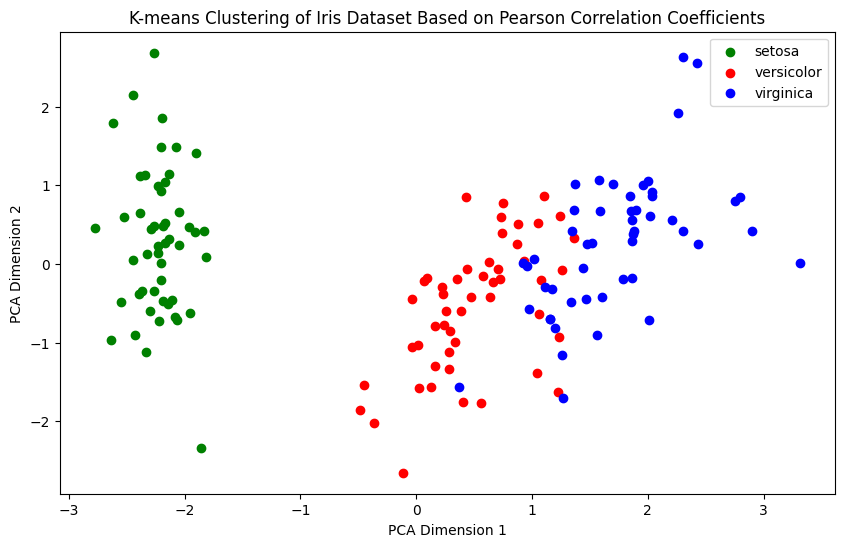

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Compute Pearson correlation coefficients
correlation_matrix = np.corrcoef(data_scaled, rowvar=False)

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(correlation_matrix)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'blue'}
for i, species in enumerate(species_names):
    cluster_points = data_pca[true_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Pearson Correlation Coefficients')
plt.legend()
plt.show()


SPEARMAN RANK CORRELATION

In [ ]:
# Function to rank the data points
def rank_data(data):
    ranked_data = []
    for feature in zip(*data):
        sorted_index = sorted(range(len(feature)), key=lambda x: feature[x])
        ranks = [0] * len(feature)
        for rank, index in enumerate(sorted_index):
            ranks[index] = rank
        ranked_data.append(ranks)
    return list(zip(*ranked_data))

# Function to calculate Spearman rank correlation coefficient
def spearman_rank_correlation(point1, point2):
    n = len(point1)
    rank_diff = [(rank1 - rank2) ** 2 for rank1, rank2 in zip(point1, point2)]
    sum_rank_diff = sum(rank_diff)
    return 1 - (6 * sum_rank_diff) / (n * (n**2 - 1))

# Function to calculate Spearman distance
def spearman_distance(point1, point2):
    return 1 - spearman_rank_correlation(point1, point2)


In [ ]:
# Calculate Spearman distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = spearman_distance(features[i], features[j])
        distances.append((i, j, dist))

# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])

# Print the shortest distance and the corresponding class names
print(f"The shortest spearman rank distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")


In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {features[2]}")

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
spearman = pd.DataFrame(distances1, columns=["A","B","spearman"])
spearman.to_excel("spearman.xlsx",index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


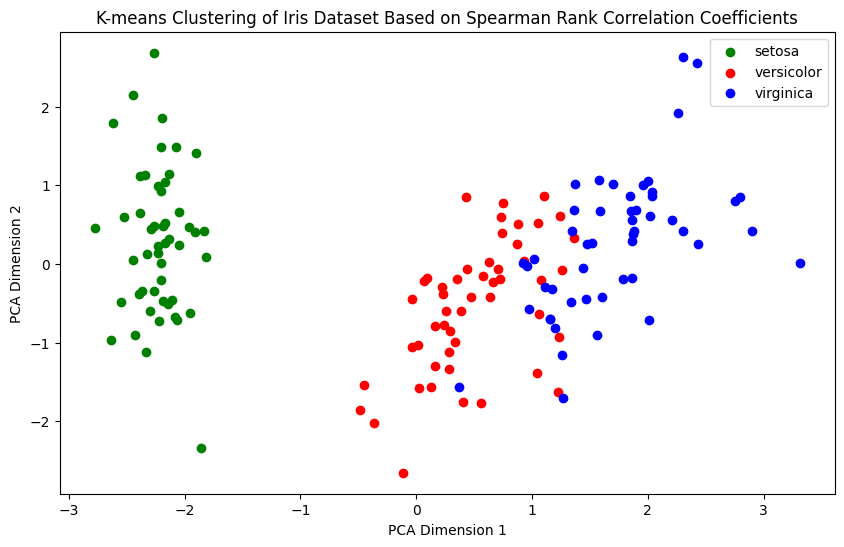

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Compute Spearman rank correlation coefficients
correlation_matrix = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        corr, _ = spearmanr(data[:, i], data[:, j])
        correlation_matrix[i, j] = corr

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(correlation_matrix)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'blue'}
for i, species in enumerate(species_names):
    cluster_points = data_pca[true_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Spearman Rank Correlation Coefficients')
plt.legend()
plt.show()


KENDALL'S TAU DISTANCE

In [ ]:
# Function to rank the data points
def rank_data(data):
    ranked_data = []
    for feature in zip(*data):
        sorted_index = sorted(range(len(feature)), key=lambda x: feature[x])
        ranks = [0] * len(feature)
        for rank, index in enumerate(sorted_index):
            ranks[index] = rank
        ranked_data.append(ranks)
    return list(zip(*ranked_data))

# Function to calculate Kendall's Tau distance
def kendalls_tau_distance(point1, point2):
    n = len(point1)
    num_discordant_pairs = 0
    num_concordant_pairs = 0
    for i in range(n):
        for j in range(i + 1, n):
            if (point1[i] - point1[j]) * (point2[i] - point2[j]) > 0:
                num_concordant_pairs += 1
            elif (point1[i] - point1[j]) * (point2[i] - point2[j]) < 0:
                num_discordant_pairs += 1
    total_pairs = n * (n - 1) // 2
    return num_discordant_pairs / total_pairs


In [ ]:
# Calculate Kendall's Tau distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = kendalls_tau_distance(features[i], features[j])
        distances.append((i, j, dist))

# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])
print(f"The shortest kendall's Tau distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")




In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {dist[2]}")

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
kendall = pd.DataFrame(distances1, columns=["A","B","kendall"])
kendall.to_excel("kendall.xlsx",index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


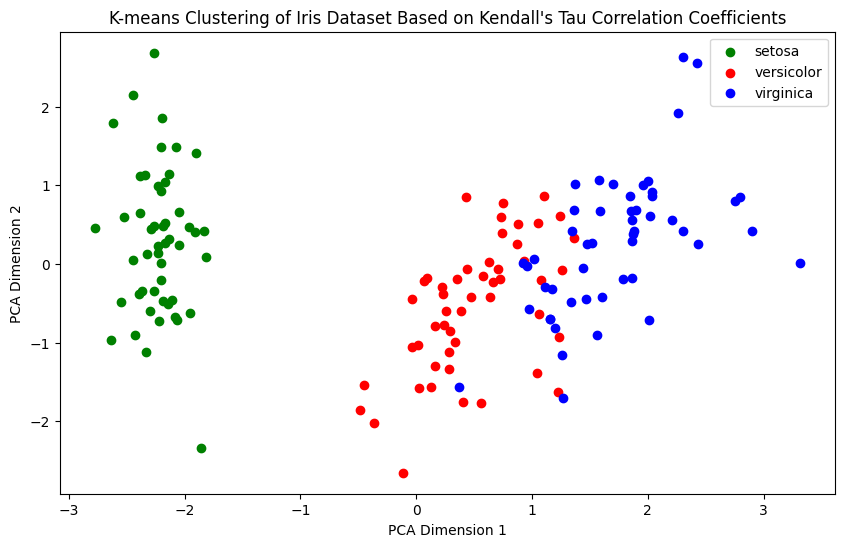

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import kendalltau

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Compute Kendall's tau correlation coefficients
correlation_matrix = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        corr, _ = kendalltau(data[:, i], data[:, j])
        correlation_matrix[i, j] = corr

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(correlation_matrix)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'blue'}
for i, species in enumerate(species_names):
    cluster_points = data_pca[true_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Kendall\'s Tau Correlation Coefficients')
plt.legend()
plt.show()


PHI COEFFICIENT

In [ ]:
# Function to binarize the dataset
def binarize_data(data):
    data = np.array(data)
    means = np.mean(data, axis=0)
    binary_data = (data > means).astype(int)
    return binary_data

# Function to calculate Phi coefficient
def phi_coefficient(point1, point2):
    n = len(point1)
    assert n == len(point2), "Points must have the same dimension"

    a = b = c = d = 0
    for i in range(n):
        if point1[i] == 1 and point2[i] == 1:
            a += 1
        elif point1[i] == 1 and point2[i] == 0:
            b += 1
        elif point1[i] == 0 and point2[i] == 1:
            c += 1
        elif point1[i] == 0 and point2[i] == 0:
            d += 1

    denominator = math.sqrt((a + b) * (a + c) * (b + d) * (c + d))
    if denominator == 0:
        return 0
    return (a * d - b * c) / denominator

# Function to calculate Phi coefficient distance
def phi_distance(point1, point2):
    return 1 - phi_coefficient(point1, point2)


In [ ]:
# Calculate Phi distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = phi_distance(features[i], features[j])
        distances.append((i, j, dist))

# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])
print(f"The shortest phi coefficient distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")


In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {dist[2]}")

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
Phi = pd.DataFrame(distances1, columns=["A","B","Phi"])
Phi.to_excel("Phi.xlsx",index=False)

JACCARD DISTANCE

In [ ]:
# Function to binarize the dataset
def binarize_data(data):
    transposed_data = list(zip(*data))
    binary_data = []
    for feature in transposed_data:
        mean_value = sum(feature) / len(feature)
        binary_feature = [1 if x > mean_value else 0 for x in feature]
        binary_data.append(binary_feature)
    return list(zip(*binary_data))

# Function to calculate Jaccard distance
def jaccard_distance(point1, point2):
    union_count = len(set(point1).union(point2))
    intersection_count = len(set(point1).intersection(point2))
    return 1 - (intersection_count / union_count)

In [ ]:
# Calculate Jaccard distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = jaccard_distance(features[i], features[j])
        distances.append((i, j, dist))

# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])
print(f"The shortest jaccard distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")



In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between point {dist[0]} and point {dist[1]}: {dist[2]}")

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
jac = pd.DataFrame(distances1, columns=["A","B","jac"])
jac.to_excel("jac.xlsx",index=False)

HAMMING DISTANCE

In [ ]:
# Function to binarize the dataset
def binarize_data(data):
    transposed_data = list(zip(*data))
    binary_data = []
    for feature in transposed_data:
        mean_value = sum(feature) / len(feature)
        binary_feature = [1 if x > mean_value else 0 for x in feature]
        binary_data.append(binary_feature)
    return list(zip(*binary_data))

# Function to calculate Hamming distance
def hamming_distance(point1, point2):
    return sum(bit1 != bit2 for bit1, bit2 in zip(point1, point2))


In [ ]:
# Calculate Hamming distances between each pair of data points
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = hamming_distance(features[i], features[j])
        distances.append((i, j, dist))

# Find the shortest distance
shortest_distance = min(distances, key=lambda x: x[2])
print(f"The shortest hamming distance is between point {shortest_distance[0]} and point {shortest_distance[1]}: {shortest_distance[2]}")


In [ ]:
# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {dist[2]}")

In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
Ham = pd.DataFrame(distances1, columns=["A","B","Hamming"])
Ham.to_excel("Ham.xlsx",index=False)

SORENSEN-DICE CORRELATION

In [ ]:
# Function to binarize the dataset
def binarize_data(data):
    transposed_data = list(zip(*data))
    binary_data = []
    for feature in transposed_data:
        mean_value = sum(feature) / len(feature)
        binary_feature = [1 if x > mean_value else 0 for x in feature]
        binary_data.append(binary_feature)
    return list(zip(*binary_data))

# Function to calculate Sørensen–Dice correlation distance
def sorensen_dice_distance(point1, point2):
    numerator = sum(bit1 & bit2 for bit1, bit2 in zip(point1, point2))
    denominator = sum(bit1 | bit2 for bit1, bit2 in zip(point1, point2))
    return 1 - (2 * numerator / denominator)


In [ ]:
# Binarize the dataset
binary_dataset = binarize_data(features)

In [ ]:
distances = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        dist = sorensen_dice_distance(features[i], features[j])
        distances.append((i, j, dist))

# Print a few example distances
for dist in distances[:10]:  # Print first 10 distances
    print(f"Distance between {features[dist[0]]} and {features[dist[1]]}: {dist[2]}")


In [ ]:
import numpy as np
import pandas as pd
distances1 = np.array(distances)
dice = pd.DataFrame(distances1, columns=["A","B","Sorencen"])
dice.to_excel("dice.xlsx",index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# Load the Iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target
species_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Binarize the data using median instead of mean to avoid potential numerical issues
data_binary = (data_scaled > np.median(data_scaled, axis=0)).astype(int)

# Compute Sørensen-Dice distance
def sorensen_dice_distance(u, v):
    return 1 - (2 * np.sum(u & v) / (np.sum(u) + np.sum(v)))

# Create a distance matrix using Sørensen-Dice distance
distance_matrix = squareform(pdist(data_binary, metric=sorensen_dice_distance))

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(distance_matrix)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'blue'}
for i, species in enumerate(species_names):
    cluster_points = data_pca[true_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[species], label=species)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('K-means Clustering of Iris Dataset Based on Sørensen-Dice Distance')
plt.legend()
plt.show()


<ipython-input-2-360d68c050bb>:24: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (2 * np.sum(u & v) / (np.sum(u) + np.sum(v)))


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values